<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/main/2348513_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [4]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
pd.unique(data['region'])

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
data.shape

(1338, 7)

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns=['sex','smoker', 'region']
data_encoded=pd.get_dummies(data ,columns=categorical_columns,drop_first=True)
print(data_encoded)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400         0           1   
1      18  33.770         1   1725.55230         1           0   
2      28  33.000         3   4449.46200         1           0   
3      33  22.705         0  21984.47061         1           0   
4      32  28.880         0   3866.85520         1           0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830         1           0   
1334   18  31.920         0   2205.98080         0           0   
1335   18  36.850         0   1629.83350         0           0   
1336   21  25.800         0   2007.94500         0           0   
1337   61  29.070         0  29141.36030         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0  

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X=data_encoded.drop('charges',axis=1)
y=data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model =LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 5.58549587e+03,  2.82446295e+04,  1.11983930e+04,  1.19395839e+04,
        2.49204013e+04,  7.42060224e+03,  1.46666642e+04,  3.05539944e+04,
        1.18145313e+04,  3.16121776e+04,  3.32665018e+04,  1.19348301e+04,
        1.45021793e+04,  1.09866607e+04,  1.27603345e+04,  6.77257642e+03,
        6.29430425e+03,  3.89433422e+04,  3.48381315e+04,  8.34324712e+03,
        1.22909340e+04,  1.92792857e+03,  5.56637206e+03,  3.24439431e+04,
        1.38636639e+04,  2.60977054e+04,  1.45089630e+04,  1.85252253e+03,
        6.82262112e+03,  8.84738620e+03,  3.07720452e+04,  9.06282417e+03,
        3.16416352e+04,  3.63100210e+04,  2.36230680e+04,  1.10894364e+03,
        1.40119865e+04,  1.03129582e+04,  9.25727862e+03,  1.64402244e+04,
        7.69127038e+03,  1.30539969e+04,  8.32895297e+03,  8.19417792e+03,
        1.01406724e+03,  1.03081822e+04,  3.86425540e+03,  2.76896020e+04,
        6.27225718e+03,  1.00977092e+04,  1.40753412e+04,  2.51450635e+04,
        8.63865014e+03,  

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model's performance
mae =mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error: 4358.28
Mean Squared Error: 39737837.06
Root Mean Squared Error: 6303.80
R-squared (R2) Score: 0.73


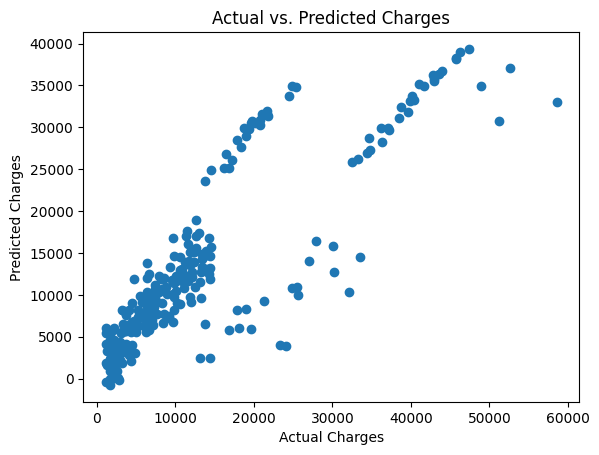

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

In [13]:
#adjusted r squared
n =len(y_test)
p=X_test.shape[1]
p
adj_r2= 1 - (1-r2) * (n - 1) / (n - p -1)
print(f"adjusted R-squared:{adj_r2:.2f}")

adjusted R-squared:0.73


In [14]:
#residual sum of squares
rss = ((y_test-y_pred)**2).sum()
print(f"Residual sum of squares :{rss:.2f}")
print("")

Residual sum of squares :10649740332.15



In [17]:
# Get the coefficients of the model
coefficients = base_model.coef_
abs_coefficients=abs(coefficients)
# Create a DataFrame to display the coefficients along with feature names
feature_names = X_train.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients,'Absolute_Coefficient':abs_coefficients})

# Sort the coefficients by absolute value in descending order to identify the most important features

coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Print the feature importance table
print(coefficients_df)
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.show()


NameError: ignored

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='blue', linewidth=2)
plt.show()


In [ ]:
print("we can say that from the above the factors that contribute to higher medical insurance are is region and smoking and with smaller impacts can be bmi  and age  and also the individuals reduce the cost of insurance by quit smoking lifestyle etc ")